# Housing Price Prediction : Linear Regression

## Introduction

The project will implement a Linear Regression + Batch Gradient Descent to predict the housing price. The objective is to understand and create a Linear Regression and Batch Gradient Descent algorithm. The dataset is obtained from the Exercise 1 of the CS229 - 2018 Harvard class. It consist of 47 examples with the following 2 features (house size & number of bedrooms) and a label (house price).

The project consists of the following sections,

| Section | Part                                            |Explanation                                    | 
|---------|:-                                               |:-                                             |
| 1       | [Review](#section1)                             | The equations which will be used to create the Linear Regression Class |
| 2       | [Define Linear Regression Class](#section2)                     | The LG class serves as a self-built LG algorithm with Batch GD |
| 3       | [Housing Price Prediction with LG Class](#section3)     | Evaluate LG model with test set         |
| 4       | [Vary Number of Batch GD iterations](#section4)     | Experiment what would happen if `num_iters` is too small or too big          |
| 5       | [Vary Learning Rate](#section5)     | Experiment what would happen if $\alpha$ is too low or too high         |
| 6       | [Conclusion](#section6)     | Take aways of the project         |

<a id="section1"></a>
## 1:  Review 

The Linear Regression class will utilize the following Cost Function as the optimization objective,

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

which the hyptothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$$


The Batch Gradient Descent is then performed in iterations to simultaneously updates $\theta_j$ as follows,

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

which $\alpha$ is the learning rate parameter.

Moreover, vectorization is also implemented in the Linear Regression class.

<a id="section2"></a>
## 2:  Define a Linear Regression Class 
The class pipeline will be,

| Pipeline | Part               |Explanation                       | 
| ---------|:-                  |:-                                |
| 1        | Load the dataset   | Create training/test set                      |
| 2        | Feature Normalization   | Using Matplotlib pyplot          |
| 3        | Gradient Descent   | Batch Gradient Descent           |
| 4        | Cost Function      | Mean Squared Error Cost Function |
| 5        | Execute      | Execute the pipeline |
| 6        | Predict      | Predict the price given `theta`, `alpha`, and `num_iters` |

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LinearRegression:
    def __init__(self):
        '''
        The method will load the dataset and initialize important value. 
        
        STEPS
        -----
        1. Loading dataset : Refer to the load_data method for details
        
        2. Initialize Theta.
            Theta is as a vector of 0 with a size of n
        '''
        
        self.load_data()
        self.theta = np.zeros(self.n)
        
    def load_data(self):
        '''
        The method will load the dataset from a CSV file named 'ex1data2.txt'. 
        The dataset consists of 47 examples, we will divide it into the 
        training set and test set. Due to limited number of examples, we will 
        only assign the last 5 of the data as the test set.
        
        Note: The raw dataset has been shuffled randomly before.
        
        STEPS
        -----
        1. Load the CSV file
        2. Assign the following variables,
            m : number of dataset examples
            n : number of dataset features that includes the bias term
        
        3. Assign the training and test set,
            m_training : number of training set examples
            X = training set features,
                X[0] : housing size
                X[1] : number of bedrooms
            y : training set housing price
            
        4. Assign the test set,
            X_test : test set features,
                X_test[0] : housing size
                X_test[1] : number of bedrooms
            y_test : test set housing prices
        '''
        
        # STEP 1
        self.dataset = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',', dtype=np.int64)
        
        # STEP 2
        self.m = self.dataset.shape[0]
        self.n = self.dataset.shape[1]
        
        # STEP 3
        self.m_training = self.m - 5
        self.X = self.dataset[:self.m_training, :2]
        self.y = self.dataset[:self.m_training, 2]
        
        self.X_test = self.dataset[self.m_training+1:self.m, :2]
        self.y_test = self.dataset[self.m_training+1:self.m, 2]
            
    def features_normalization(self):
        '''
        The method will normalize the features' values so it has a mean
        of 0 and a standard deviation of 1. The process will implement 
        vectorization in Numpy. After normalization, the bias term will be
        assigned to the features as X[0].
        
        RETURN
        ------
            X_norm : normalized features matrix with a size of m x n, 
                X[0] : Bias term
                X[1] : Feature #1
                X[2] : Feature #2
                
        STEPS
        ----
        1. Initialize matrix size,
            X_norm = copy features' matrix size
            mean = create mean expected matrix size
            sigma = create standard deviation expected matrix size
        
        2. Calculate the values,
            mean = calculate the mean of each features using numpy
            sigma = calculate the standard deviation of each features using
                    numpy
        
        3. Calculate normalized features. 
        4. Add bias term to the normalized features.
            X_norm includes normalized features (as X[1] and X[2]) and bias term
            as X[0]
        '''
        
        # STEP 1
        X_norm = self.X.copy()
        mean = np.zeros(self.X.shape[1])
        sigma = np.zeros(self.X.shape[1])
        
        # STEP 2
        self.mean = np.mean(self.X, axis=0)
        self.stdev = np.std(self.X, axis=0)
        
        # STEP 3
        X_norm = (self.X - self.mean) / self.stdev
        
        # STEP 4
        X_norm = np.concatenate([np.ones((self.m_training, 1)), X_norm], axis=1)
        return X_norm
    
    def compute_h_theta(self, X, theta):
        '''
        The method will predict the housing price.
        
        PARAMETERS
        ----------
            X : normalized features matrix with a size of m x n
            theta : features' parameters vector with a size of n
        
        RETURN
        ------
            h_theta : housing price prediction vector with a size of n
        '''
        
        h_theta = np.dot(X, theta)
        return h_theta
    
    def compute_cost(self, theta):
        '''
        The method will calculate the cost. The cost function measures how 'far' 
        the hypothesis is from the optimization objective. The higher the cost, 
        the further away the hypothesis from the optimization objective.
        
        PARAMETERS
        ----------
            theta : features' parameters vector with a size of n
        
        RETURN
        ------
            J : cost of current hypothesis 
        '''
        
        # Calculate the h_theta with current theta
        h_theta = self.compute_h_theta(self.X, theta)
        
        # Calculate the cost with given h_theta
        J = 1/(2*self.m_training) * np.sum(np.square((h_theta - self.y)))
        
        return J
        
    def gradient_descent(self):
        '''
        The method will perform Gradient Descent to optimize parameters
        theta. Gradient descent will optimized theta to obtain cost as lowest as
        possible.
        
        RETURN
        ------
            theta : optimized theta parameters vector with a size of n
            J_hist : the evolution of cost as a function of number of iterations
                    (num_iters)
        '''
        
        J_hist = []
        theta = self.theta.copy()
        
        for i in range(self.num_iters):
            theta = theta - (self.alpha/self.m_training) * (self.compute_h_theta(self.X, theta) - self.y).dot(self.X)
            J_hist.append(self.compute_cost(theta))
        
        return theta, J_hist
    
    def execute(self, alpha, num_iters):
        '''
        The method will perform the full pipeline of a Linear Regression.
        
        PARAMETERS
        ----------
            alpha : learning rate (dtype : float)
            num_iters : number of iterations (dtype : int)

        RETURN
        ------
            theta : optimized theta parameters vector with a size of n
            J_hist : the evolution of cost as a function of number of iterations
                    (num_iters)
                    
        STEPS
        ----
        1. Initialize important values,
        2. Perform features normalization,
        3. Perform Gradient Descent
        4. Return the optimized theta and the J_hist
        '''

        self.num_iters = num_iters
        self.alpha = alpha
        self.X = self.features_normalization()
        self.theta, self.J_hist = self.gradient_descent()
        
        return self.theta, self.J_hist
    
    def predict(self, X):
        '''
        The method will perform the housing price prediction.
        
        PARAMETERS
        ----------
            X : housing features
                X[0] : housing size
                X[1] : number of bedrooms

        RETURN
        ------
            price : predicted price given the self.theta
                    
        STEPS
        ----
        1. Perform features normalization,
        2. Add bias term,
        3. Calculate the prediction.

        '''

        # STEP 1
        X_norm = (X - self.mean) / self.stdev
        
        # STEP 2
        bias_unit = np.ones((X_test.shape[0],1))
        X = np.hstack((bias_unit,X_norm))
        
        # STEP 3
        price = self.compute_h_theta(X, self.theta) 
        return price

<a id="section3"></a>
## 3:  Housing Price Prediction with Linear Regression class 
In section 3, we will predict the housing price using a self-built Linear Regression class on Section 2.

The dataset has 2 features:
1. Housing Size
2. Number of bedrooms

In [3]:
housing_prediction = LinearRegression()

print('{:>8s}{:>11s}{:>7s}'.format('Size', 'bedrooms', 'price'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(housing_prediction.X[i, 0], housing_prediction.X[i, 1], housing_prediction.y[i]))

    Size   bedrooms  price
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


After parameters have been initialized, we should choose the parameters:

1. Learning rate $\alpha$ 
2. Number of Batch Gradient Descent iterations

Note:

It is important to choose proper learning rate $\alpha$. If learning rate is high, the Batch GD might overshoot the local minimum and fail to identify local/global minimum. If too high, the Batch GD might diverge. It is also important to choose a sufficient number of iterations. If insufficient, the Batch GD might not yet converged into a local/global minimum.

In this project, let's choose $\alpha$ = 0.01 and `num_iters` = 1000

In [4]:
theta, J_hist = housing_prediction.execute(0.01, 1000)

After executed, let's plot the cost function as a function of number of iterations

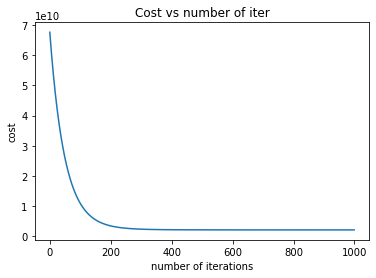

In [5]:
plt.plot(J_hist)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('Cost vs number of iter')
plt.show()

From the figure above, it seems both learning rate $\alpha$ and `num_iters` are correctly chosen. The Batch GD is able to converge to the global minimum (convex function) at iteration 400. After the model is created, let's evaluate the model using the test set.

In [6]:
X_test = housing_prediction.X_test.copy()
predicted_price = housing_prediction.predict(housing_prediction.X_test)

After evaluated, let's print the compile the results

In [7]:
print('{:>8s}{:>10s}{:>14s}{:>16s}'.format('Size', 'bedrooms', 'Actual price', 'Predicted price'))
print('-'*26)
for i in range(4):
    print('{:8.0f}{:6.0f}{:15.0f}{:13.0f}'.format(housing_prediction.X_test[i, 0], housing_prediction.X_test[i, 1], housing_prediction.y_test[i], predicted_price[i]))

    Size  bedrooms  Actual price Predicted price
--------------------------
    1200     3         299000       229372
     852     2         179900       185824
    1852     4         299900       315797
    1203     3         239500       229795


From the table above, the predicted price could be off up to 10%. It is not perfect, but the the model does a decent job given  a very limited $m_{training}$ 

<a id="section4"></a>
## 4:  Vary Number of Batch GD iterations 
In section 4, we will investigate what would happen if `num_iters` is too small or too big

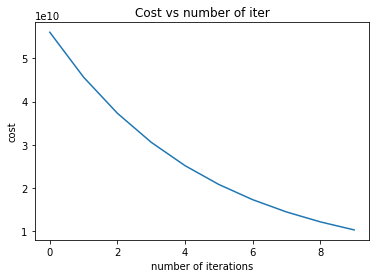

In [8]:
housing_low_num_iters = LinearRegression()
theta, J_hist = housing_low_num_iters.execute(0.1, 10)
plt.plot(J_hist)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('Cost vs number of iter')
plt.show()

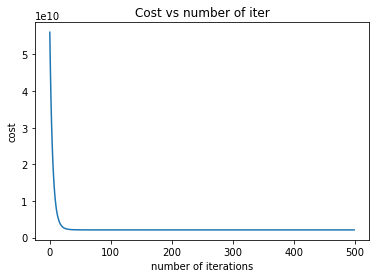

In [9]:
housing_high_num_iters = LinearRegression()
theta, J_hist = housing_high_num_iters.execute(0.1, 500)
plt.plot(J_hist)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('Cost vs number of iter')
plt.show()

From the first figure, the Batch GD has not yet converged into the global minimum yet the iteration has stopped. Thus, the hypothesis $h_{\theta}(x)$ might be not good enough with respect to the optimization objective.

Meanwhile on the second figure, The Batch GD has converged to the global minimum around `num_iters = 50`. There is no point to push the `num_iters = 1000` or even bigger since it would be computationally expensive.

To summarize, it is important that the user uses a sufficient `num_iters`. It must not be too low (not yet converged) nor too high (computationally expensive).

<a id="section5"></a>
## 5:  Vary Learning Rate 
In section 5, we will vary the learning rate and investigate what will happen if $\alpha$ is too low or too high

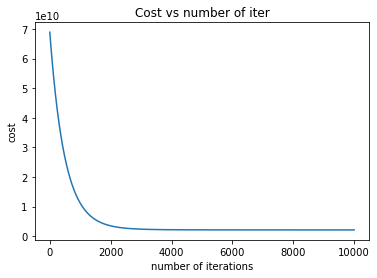

In [10]:
housing_low_alpha = LinearRegression()
theta, J_hist = housing_low_alpha.execute(0.001, 10000)
plt.plot(J_hist)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('Cost vs number of iter')
plt.show()

From the figure above, it is shown that if the $\alpha$ is too low, the Batch GD will take smaller step. Moreover, the slope is getting smaller as it approaches the local/global minimum. As the result, the model requires bigger number of iterations. The figure above indicates the model converges around `num_iters = 6000` with $\alpha$ = 0.001. This is bigger than the initial model which was `num_iters = 400` with $\alpha$ = 0.1. Thus, user should not use a very small value of alpha.

Let's investigate what will happen if the learning rate $\alpha$ is high. To make intuitive what happened when $\alpha$ is high, we will choose $\alpha$ = 1.2926

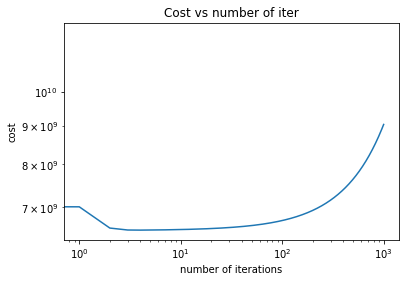

In [11]:
housing_high_alpha = LinearRegression()
theta, J_hist = housing_high_alpha.execute(1.2926, 1000)
plt.loglog(J_hist)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('Cost vs number of iter')
plt.show()

Figure above illustrates what will happen if the learning rate $\alpha$ is high. The Batch GD could overshoot the global minimum and oscillate around the global minimum (iter 1 - 10). At worst condition, Batch GD will diverge (iter >10).

Let's see what will happen if the learning rate $\alpha$ is too high (>1.5),

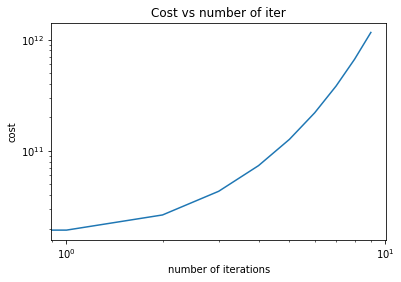

In [12]:
housing_very_high_alpha = LinearRegression()
theta, J_hist = housing_very_high_alpha.execute(1.5, 10)
plt.loglog(J_hist)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('Cost vs number of iter')
plt.show()

If $\alpha$ is too high, the Batch GD diverges dirrectly. At `iter = 1`, the cost is already in the order of $10^{10}$.

To summarize, it is helpful to identify the 'correct' alpha by plotting the cost as a function of number of Batch GD iterations. Moreover, the user should be careful in choosing the learning rate $\alpha$. It should not be too high (overshoot, diverge) nor too small (takes more iteration to converge).

<a id="section6"></a>
## 6:  Conclusion 
In this project, we have successfully developed a Machine Learning algorithm using Linear Regression and Batch Gradient Descent. The algorithm is proven able to produce a good hypothesis $h_{\theta}(x)$ given a very limited number of training examples. Moreover, the project also demonstrated the importance of choosing proper learning rate $\alpha$ and number of Batch Gradient Descent iterations `num_iters`.